# <b><p style='text-align:center'><font color = yellow>Part 04 : Statistical Analysis

### <font color = yellow>I.) Identify the model

<font color = green|>a.) Check the interaction effect between regressors

In [102]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns

In [103]:
df = pd.read_csv('train.csv')
df

,Index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
1,2,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
2,3,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,4,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
4,5,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,103590,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0,neutral or dissatisfied
103590,103591,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0,satisfied
103591,103592,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14,neutral or dissatisfied
103592,103593,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0,neutral or dissatisfied


In [104]:
df.shape

(103594, 25)

In [105]:
regressor = df.drop(columns=['satisfaction','id']).columns
regressor

Index(['Index', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [106]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['Index', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [107]:
categorical_columns = df.select_dtypes(include='object').columns
categorical_columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [108]:
# Understanding the content of all unique values
df.apply(lambda col: col.unique())

Index                                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
id                                   [70172, 5047, 110028, 24026, 119299, 111157, 8...
Gender                                                                  [Male, Female]
Customer Type                                      [Loyal Customer, disloyal Customer]
Age                                  [13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...
Type of Travel                                      [Personal Travel, Business travel]
Class                                                        [Eco Plus, Business, Eco]
Flight Distance                      [460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...
Inflight wifi service                                               [3, 2, 4, 1, 5, 0]
Departure/Arrival time convenient                                   [4, 2, 5, 3, 1, 0]
Ease of Online booking                                              [3, 2, 5, 4, 1, 0]
Gate location                              

- <font color = yellow>Transfrom categorical variable into numerical variable by encoding applying into machine learning testing

In [109]:
from sklearn.linear_model import LinearRegression

df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel': 1, 'Business travel': 2})
df['Class'] = df['Class'].map({'Eco Plus': 1, 'Business': 2,'Eco':3})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})

In [110]:
#  Reunderstanding the content of all unique values
df.apply(lambda col: col.unique())

Index                                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
id                                   [70172, 5047, 110028, 24026, 119299, 111157, 8...
Gender                                                                          [1, 2]
Customer Type                                                                   [1, 0]
Age                                  [13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...
Type of Travel                                                                  [1, 2]
Class                                                                        [1, 2, 3]
Flight Distance                      [460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...
Inflight wifi service                                               [3, 2, 4, 1, 5, 0]
Departure/Arrival time convenient                                   [4, 2, 5, 3, 1, 0]
Ease of Online booking                                              [3, 2, 5, 4, 1, 0]
Gate location                              

<font color = green|>b.) Identify confounders(confounding variables) and included them in the model

<font color = green|>Confounding variables</font> are variables that are associated with both the independent variable(s) and the dependent variable, and they can introduce bias and distort the relationship between the variables of interest. To identify potential confounders and include them in the model, you can follow these steps:

1. Understand the research question: Clarify the research question and identify the variables that are hypothesized to be the main predictors (independent variables) and the outcome of interest (dependent variable).

2. Conduct a literature review: Review existing literature to identify potential confounding variables that have been previously associated with both the independent and dependent variables. Look for studies that have investigated similar research questions or related topics.

3. Consider causal knowledge: Use your knowledge of the subject matter and causal relationships to identify variables that could act as confounders. Consider variables that are on the causal pathway between the independent and dependent variables or those that are associated with both the exposure and outcome but are not part of the causal pathway.

4. Analyze data distribution: Examine the distribution and relationship between the variables using techniques such as descriptive statistics, correlation analysis, or visualization methods. Look for variables that show a significant association with both the independent and dependent variables.

5. Include potential confounders in the model: Once potential confounders are identified, include them as additional independent variables in the model. This helps to control for their influence on the relationship between the main predictors and the outcome. Adjusting for confounders can help isolate the true effect of the independent variables on the outcome.

6. Assess the impact: Fit the model with the confounders included and examine the changes in the coefficients and significance levels of the main predictors. If the inclusion of confounders substantially changes the relationship between the independent variables and the outcome, it suggests their confounding effect.

It's important to note that the identification and inclusion of confounders require subject matter expertise, careful consideration of the research question, and a thorough understanding of the data. Additionally, the availability of data on potential confounders is crucial for their inclusion in the model.

<Font color = green|><p style='text-align:center'>Based on literature review we can conclude the Confounding Variable are such following :</p></font>
- <font color = green|>Age:</font> Age may be associated with both the predictor variables (e.g., Gender, Type of Travel, Class) and customer satisfaction. For example, different age groups may have varying preferences or expectations when it comes to airline experiences.

- <font color = green|>Type of Travel:</font> The purpose of travel (Personal or Business) may be associated with both the predictor variables (e.g., Gender, Class) and customer satisfaction. Business travelers, for instance, might have different satisfaction levels compared to personal travelers due to their specific needs and expectations.

- <font color = green|>Class:</font> The class of travel (Eco Plus, Business, Eco) could be a confounding variable as it may be associated with both the predictor variables (e.g., Gender, Type of Travel) and customer satisfaction. Different classes may offer distinct services or amenities that can impact satisfaction levels.

- <font color = green|>Gender:</font> The Gender(Male,Female) might be a confounding variable because of corresponding to predictor(Food and Drink,Checkin service, Inflight Entertainment)

It is important to note that the identification of confounding variables requires a comprehensive analysis of the data, including statistical modeling and hypothesis testing. The impact of potential confounders can vary depending on the specific research question, dataset characteristics, and analytical techniques employed. Therefore, it is advisable to conduct a rigorous analysis to identify and appropriately account for confounding variables in the research study.

<font color = pink><p style='text-align:center'>By checking correlation and graph representation we obtain the confounding variable as following : </font> 
- Inflight wifi service->(Ease of Online booking, Online boarding,)
- Departure/Arrival time convenient->(Ease of Online booking, Gate location)
- Ease of Online booking->(Inflight wifi service, Departure/Arrival Time convenient, Gate location, Online boarding)
- Gate location->(Ease of Online booking, )

<font color = green|>c.) Identify colliders and included them in the model

### <font color = yellow>II.) Fit the model

<font color = green|>a.) Try to test fit many models

In [111]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Separate the independent variables (features) and the target variable
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(82875, 24)

In [112]:
X_test.shape

(20719, 24)

- <Font color = yellow>Linear Regression

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = model.score(X_test, y_test)
print('R-squared = ',r_squared)

# Get the R-squared value and the number of observations and predictors
n = len(X_test)
k = len(X_test.columns) - 1  # Subtract 1 to exclude the constant column
# Calculate the adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
print('Adjusted_r_squared =',adjusted_r_squared)

Mean Squared Error: 0.11272071732255068
R-squared =  0.5419539419576749
Adjusted_r_squared = 0.5414448789310997


In [114]:
# Add a constant column to the features (required by statsmodels)
X = sm.add_constant(X_train)

# Create a linear regression model
model = sm.OLS(y_train, X)

# Fit the model on the data
results = model.fit()

# Get the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     4162.
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        19:26:52   Log-Likelihood:                -26608.
No. Observations:               82875   AIC:                         5.327e+04
Df Residuals:                   82850   BIC:                         5.350e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

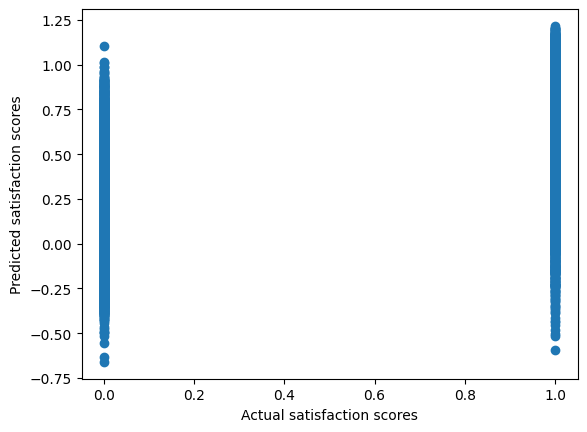

In [115]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual satisfaction scores')
plt.ylabel('Predicted satisfaction scores')
plt.show()

- <Font color = yellow>Logistic Regression Model

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = model.score(X_test, y_test)
print('R-squared = ',r_squared)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get the R-squared value and the number of observations and predictors
n = len(X_test)
k = len(X_test.columns) - 1  # Subtract 1 to exclude the constant column
# Calculate the adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
print('adjusted_r_squared =',adjusted_r_squared)

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

Mean Squared Error: 0.31526618080023167
R-squared =  0.6847338191997683
Accuracy: 0.6847338191997683
adjusted_r_squared = 0.6843834388103793
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     11655
           1       0.63      0.67      0.65      9064

    accuracy                           0.68     20719
   macro avg       0.68      0.68      0.68     20719
weighted avg       0.69      0.68      0.69     20719



c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [117]:
import statsmodels.api as sm

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
results = model.fit()

# Get the summary of the logistic regression results
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.421561
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                82875
Model:                          Logit   Df Residuals:                    82851
Method:                           MLE   Df Model:                           23
Date:                Tue, 23 May 2023   Pseudo R-squ.:                  0.3837
Time:                        19:27:11   Log-Likelihood:                -34937.
converged:                       True   LL-Null:                       -56684.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Index                             -6.533e-06   3.14e-07    -20

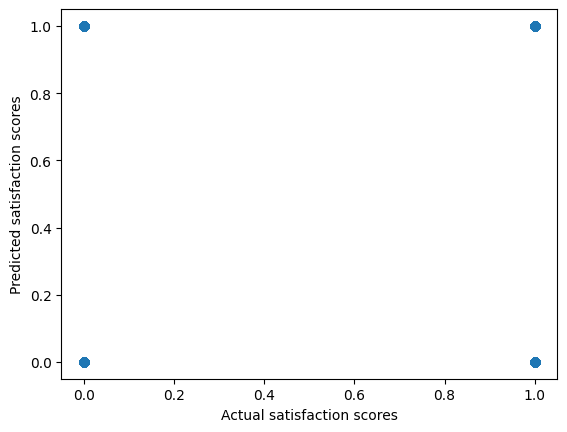

In [120]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual satisfaction scores')
plt.ylabel('Predicted satisfaction scores')
plt.show()

### <font color = yellow>III.) Observe p-value and interpretation

<font color = green|>Interpretation for linear regression result:</font>
- "Customer Type," "Age," "Type of Travel," "Class," "Flight Distance," "Inflight wifi service," "Departure/Arrival time convenient," "Ease of Online booking," "Gate location," "Online boarding," "Seat comfort," "Inflight entertainment," "On-board service," "Leg room service," "Baggage handling," "Checkin service," "Inflight service," "Cleanliness," "Departure Delay in Minutes," and "Arrival Delay in Minutes" all have p-values less than 0.05, indicating they are statistically significant predictors of satisfaction.

- The "Index" and "id" variables have p-values greater than 0.05 (e.g., 0.071 and 0.000, respectively), suggesting weak evidence against the null hypothesis. This implies that these variables may not have a statistically significant effect on satisfaction.

<font color = green|>Interpretation for logistic regression result:</font>
- "Index," "id," "Gender," "Customer Type," "Age," "Type of Travel," "Class," "Flight Distance," "Inflight wifi service," "Departure/Arrival time convenient," "Ease of Online booking," "Gate location," "Food and drink," "Online boarding," "Seat comfort," "Inflight entertainment," "On-board service," "Leg room service," "Baggage handling," "Checkin service," "Inflight service," "Departure Delay in Minutes," and "Arrival Delay in Minutes" all have p-values less than 0.05, indicating they are statistically significant predictors of satisfaction.

- "Cleanliness" variable has a p-value of 0.616, which is greater than 0.05. This suggests weak evidence against the null hypothesis, indicating that "Cleanliness" may not have a statistically significant effect on satisfaction.

The coefficients represent the change in the log-odds of satisfaction for a one-unit change in the corresponding independent variable. For example, a one-unit increase in "Inflight wifi service" corresponds to an increase of approximately 0.378 in the log-odds of satisfaction.

Positive coefficients indicate that an increase in the independent variable is associated with higher log-odds (higher probability) of satisfaction, while negative coefficients indicate that an increase in the independent variable is associated with lower log-odds (lower probability) of satisfaction.

### <font color = yellow>IV.) Check influential outliers

<font color = green|>a.) Looking at leverage

<font color = green|>b.) If there is, resolve the problem. Another model can be fitted without the influential outliers and then interpret and compare the two models. Leave it to scientists to choose which model we prefer the most.

### <font color = yellow>V.) Check all model assumptions and resolve any problems related to your model assumptions

# <b><p style='text-align:center'><font color = yellow>Discussions and conclusions

### <font color = yellow>I.) Discuss your outputs/parameter estimates and more and compare them with previous research papers if any.

### <font color = yellow>II.) State your conclusion on the objectives/research questions

# <b><p style='text-align:center'><font color = yellow>Limitation and further research

### <Font color = yellow>I.) State if there are any concerns in your study that are out of your control

### <font color = yellow>II.) Suggest some potential methodologies/remedies that can help to get better model/analysis of the data